##基礎演習S 後半第4回

NE21-1228F
鈴木　拓己

In [1]:
# 参考：インストール済みパッケージ
p <- installed.packages()
rownames(p)

[1] "IRdisplay"     "IRkernel"      "pbdZMQ"        "repr"         
  [5] "askpass"       "assertthat"    "backports"     "base64enc"    
  [9] "bit"           "bit64"         "blob"          "brew"         
 [13] "brio"          "broom"         "bslib"         "cachem"       
 [17] "callr"         "cellranger"    "cli"           "clipr"        
 [21] "colorspace"    "commonmark"    "cpp11"         "crayon"       
 [25] "credentials"   "curl"          "data.table"    "DBI"          
 [29] "dbplyr"        "desc"          "devtools"      "diffobj"      
 [33] "digest"        "dplyr"         "dtplyr"        "ellipsis"     
 [37] "evaluate"      "fansi"         "farver"        "fastmap"      
 [41] "forcats"       "fs"            "gargle"        "generics"     
 [45] "gert"          "ggplot2"       "gh"            "gitcreds"     
 [49] "glue"          "googledrive"   "googlesheets4" "gtable"       
 [53] "haven"         "highr"         "hms"           "htmltools"    
 [57] "httr"          "ids"           "ini"           "isoband"      
 [61] "jquerylib"     "jsonlite"      "knitr"         "labeling"     
 [65] "lifecycle"     "lubridate"     "magrittr"      "memoise"      
 [69] "mime"          "modelr"        "munsell"       "openssl"      
 [73] "pillar"        "pkgbuild"      "pkgconfig"     "pkgload"      
 [77] "praise"        "prettyunits"   "processx"      "progress"     
 [81] "ps"            "purrr"         "R6"            "rappdirs"     
 [85] "rcmdcheck"     "RColorBrewer"  "readr"         "readxl"       
 [89] "rematch"       "rematch2"      "remotes"       "reprex"       
 [93] "rlang"         "rmarkdown"     "roxygen2"      "rprojroot"    
 [97] "rstudioapi"    "rversions"     "rvest"         "sass"         
[101] "scales"        "selectr"       "sessioninfo"   "stringi"      
[105] "stringr"       "svglite"       "sys"           "systemfonts"  
[109] "testthat"      "tibble"        "tidyr"         "tidyselect"   
[113] "tidyverse"     "tinytex"       "tzdb"          "usethis"      
[117] "utf8"          "uuid"          "vctrs"         "viridisLite"  
[121] "vroom"         "waldo"         "whisker"       "withr"        
[125] "xfun"          "xml2"          "xopen"         "yaml"         
[129] "zip"           "base"          "boot"          "class"        
[133] "cluster"       "codetools"     "compiler"      "datasets"     
[137] "foreign"       "graphics"      "grDevices"     "grid"         
[141] "KernSmooth"    "lattice"       "MASS"          "Matrix"       
[145] "methods"       "mgcv"          "nlme"          "nnet"         
[149] "parallel"      "rpart"         "spatial"       "splines"      
[153] "stats"         "stats4"        "survival"      "tcltk"        
[157] "tools"         "utils"

In [ ]:
# 必要に応じて「ランタイム」＋「ランタイムを再起動」
# IPAフォントをインストール
system("apt-get install -y fonts-ipafont")
# フォント一覧を表示
# systemfonts::system_fonts()
# グラフィクスパラメータのフォントファミリーをIPAGothicに
par(family="IPAGothic")
# 確認（グラフでの日本語）
dat <- cars
head(dat, 3)
colnames(dat) <- c("速度","距離")
plot(dat)

In [ ]:
# ライブラリ
library(tidyverse)

In [6]:
# パッケージインストールと事前確認
if(!require("nnet")){install.packages("nnet")}; library(nnet)
if(!require("NeuralNetTools")){install.packages("NeuralNetTools")}; library(NeuralNetTools)

if(!require("caret")){install.packages("caret")}; library(caret)
if(!require("doParallel")){install.packages("doParallel")}; library(doParallel)
if(!require("tictoc")){install.packages("tictoc")}; library(tictoc)
library(tidyverse)

Loading required package: caret

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘caret’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Loading required package: doParallel

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘doParallel’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: foreach


Attaching package: ‘foreach’


The followin

In [ ]:
#----------------------------
# データ読み込み
#summary(iris)
dat <- iris
y <- iris$Species
#y <- data.frame(Species=dat$Species)
#----------------------------
# データ視覚化
df <- 
  dat %>%
  pivot_longer(col = -Species, names_to = "key", values_to = "value") %>%
  group_by(key) %>% 
  mutate(ScaledValue=(value-min(value))/(max(value)-min(value))) # min-max正規化
summary(dat)
# 箱ひげ図（box plot）
ggplot(df,aes(x=Species,y=ScaledValue))+
  theme_bw()+
  geom_boxplot()+
  geom_jitter(aes(color=Species),alpha=.3)+
  facet_wrap(~key)
# 度数分布多角形（frequency polygon）
ggplot(df,aes(color=Species,x=ScaledValue))+
  theme_bw()+
  geom_freqpoly()+
  facet_wrap(~key)
#----------------------------
# データ分割（訓練データとテストデータ）
set.seed(123)     # 再現性のため乱数種設定
id <- createDataPartition(y=dat[,5], p=0.7, list=FALSE)
# 訓練データ
dat_train <- dat[id,]; y_train <- y[id]
# テストデータ
dat_test <- dat[-id,]; y_test <- y[-id]
#----------------------------
# 数値データの欠損値補完　なし
# missingdata_model <- preProcess(as.data.frame(X_train), method='knnImpute')
# X_train <- predict(missingdata_model, newdata = X_train)
# X_test <- predict(missingdata_model, newdata = X_test)
#----------------------------
# 数値データの正規化・標準化
pp <- preProcess(dat_train[,-5], method = c("center", "scale"))
dat_train[,-5] <- predict(pp, newdata = dat_train[,-5])
dat_test[,-5] <- predict(pp, newdata = dat_test[,-5])

### Ex.4-5：ニューラルネット（neural network）
##### irisデータ，nnet, NeuralNetToolsパッケージ

In [19]:
# ハイパーパラメータのチューニング範囲（グリッド）指定
# gridを指定しないこともできる
grid <- expand.grid(alpha = 1, lambda = c(0, 10^(-4:2)))

# 検証方法設定
tc <-  trainControl(method = "repeatedcv",
          number = 10,          # 10-fold
          repeats = 3,          # 3回繰り返す
          selectionFunction = "best")

# 学習（モデル構築）
set.seed(123)                   # 再現性のため 
cores = detectCores() 
cl <- makePSOCKcluster(cores)   # PCのコア数（並列化）
registerDoParallel(cl)
#-----
tic()
model <- train(Species~., data=dat_train,
#              method="nnet", trControl=tc, tuneGrid=grid)
             method="nnet", trControl=tc)    # grid指定しない場合
toc()
stopCluster(cl)

# weights:  27
initial  value 132.159191 
iter  10 value 37.293533
iter  20 value 19.543038
iter  30 value 19.331017
iter  40 value 19.322141
iter  50 value 19.320168
final  value 19.320162 
converged
8.366 sec elapsed


[1] "method"       "modelInfo"    "modelType"    "results"      "pred"        
 [6] "bestTune"     "call"         "dots"         "metric"       "control"     
[11] "finalModel"   "preProcess"   "trainingData" "ptype"        "resample"    
[16] "resampledCM"  "perfNames"    "maximize"     "yLimits"      "times"       
[21] "levels"       "terms"        "coefnames"    "xlevels"

,size,decay
,<dbl>,<dbl>
6,3,0.1


a 4-3-3 network with 27 weights
inputs: Sepal.Length Sepal.Width Petal.Length Petal.Width 
output(s): .outcome 
options were - softmax modelling  decay=0.1

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Neural Network 

105 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 94, 94, 94, 94, 93, 96, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa    
  1     0e+00  0.8430471  0.7649932
  1     1e-04  0.9334512  0.8993854
  1     1e-01  0.9518182  0.9267435
  3     0e+00  0.9479293  0.9212256
  3     1e-04  0.9509596  0.9258089
  3     1e-01  0.9603535  0.9399484
  5     0e+00  0.9418687  0.9121155
  5     1e-04  0.9509596  0.9257509
  5     1e-01  0.9603535  0.9399484

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 3 and decay = 0.1.

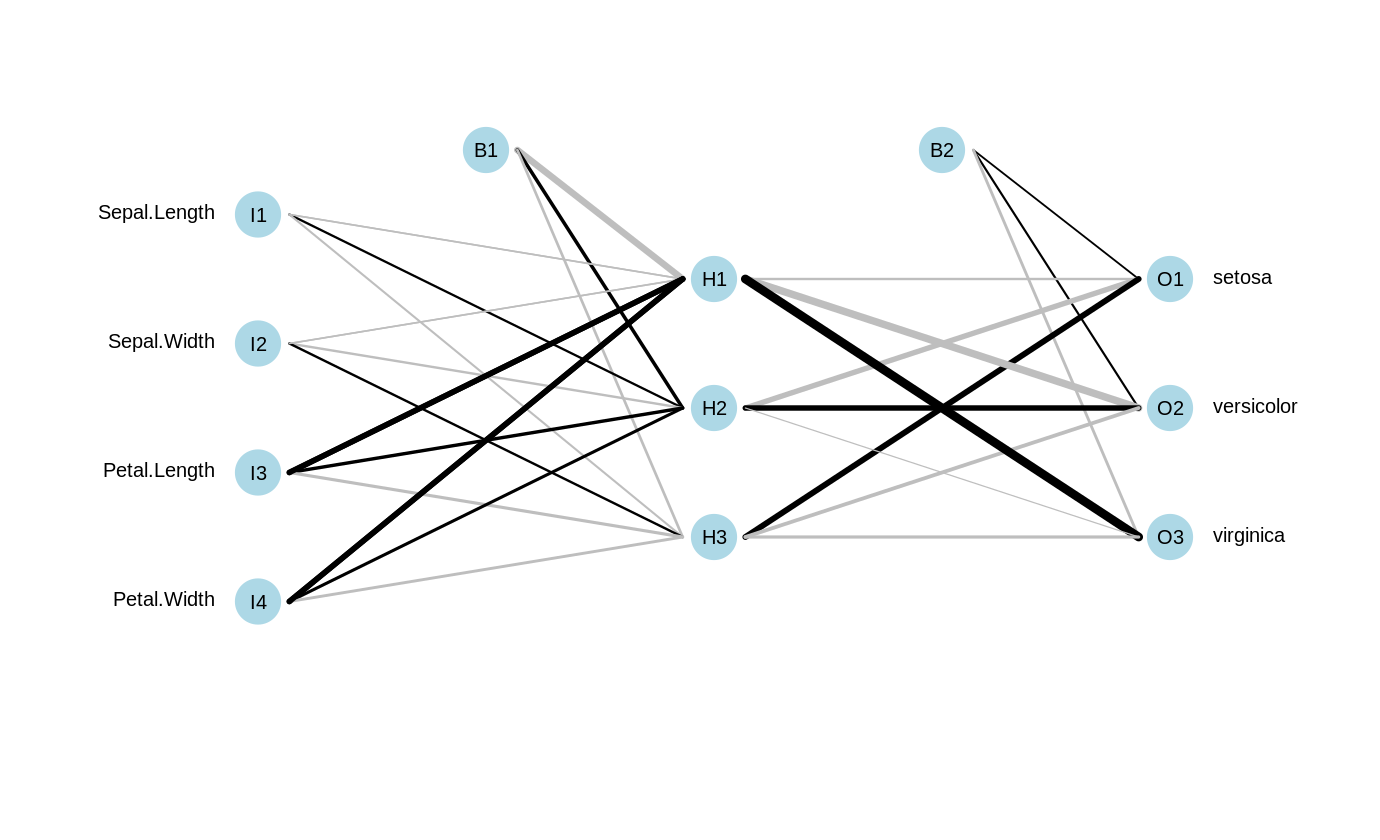

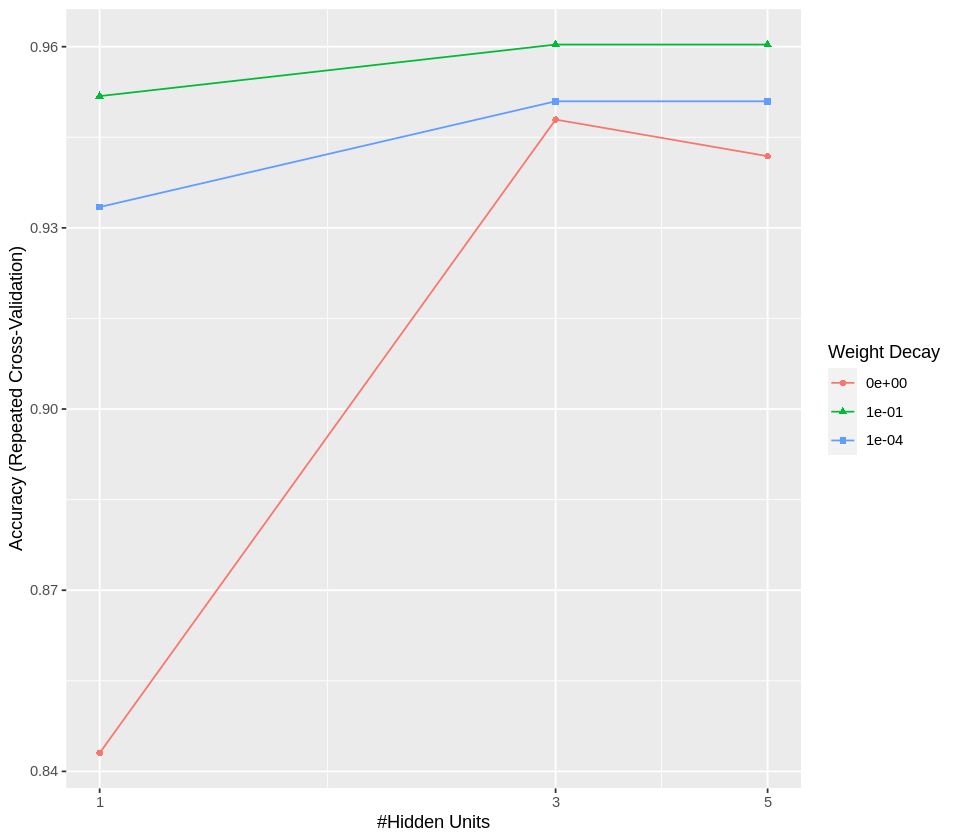

In [15]:
# 検証結果確認(1)
names(model)
# 妥当なハイパーパラメータ
model$bestTune

# 最終モデル
model$finalModel

# モデルの視覚化（パッケージにサポートがあれば）
#nnet.plot(model$finalModel)    # ★★★視覚化　使用不可
options(repr.plot.res=100, repr.plot.width=11.5)  # 図のサイズ等（適宜設定）
# ★★★NeuralNetToolsのプロットを使用せよ
install.packages("NeuralNetTools")
library(NeuralNetTools)
plotnet(model$finalModel)

# モデル概要
model

# ハイパーパラメータとパフォーマンス
options(repr.plot.res=120, repr.plot.width=8)  # 図のサイズ等（適宜設定） 
# https://okumuralab.org/~okumura/stat/colab.html
# https://search.r-project.org/CRAN/refmans/repr/html/repr-options.html

ggplot(model) + scale_x_log10()

In [17]:
# 検証結果確認(2)
# 変数重要度
#varImp(model, scale = F) %>% plot()      # ★★★機能なし？

# パフォーマンス（予測・精度確認）
pred_train <- predict(model, newdata = dat_train) %>% as.factor() # 5列目あっても可
pred_test <- predict(model, newdata = dat_test) %>% as.factor()

# 混同行列（訓練）
confusionMatrix(data = pred_train, y_train)

# 混同行列（テスト）
confusionMatrix(data = pred_test, y_test)


Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         35          0         0
  versicolor      0         33         0
  virginica       0          2        35

Overall Statistics
                                          
               Accuracy : 0.981           
                 95% CI : (0.9329, 0.9977)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9714          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9429           1.0000
Specificity                 1.0000            1.0000           0.9714
Pos Pred Value              1.0000            1.0000           0.9459
Neg Pred Value              1.0000            0.9722           1.0000
P

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         1
  virginica       0          0        14

Overall Statistics
                                          
               Accuracy : 0.9778          
                 95% CI : (0.8823, 0.9994)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9667          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.9333
Specificity                 1.0000            0.9667           1.0000
Pos Pred Value              1.0000            0.9375           1.0000
Neg Pred Value              1.0000            1.0000           0.9677
P

# weights:  27
initial  value 180.543913 
iter  10 value 104.259274
iter  20 value 81.287290
iter  30 value 59.259511
iter  40 value 26.716165
iter  50 value 23.775597
iter  60 value 23.699280
iter  70 value 23.697908
final  value 23.697907 
converged
8.096 sec elapsed


,size,decay
,<dbl>,<dbl>
6,3,0.1


Neural Network 

150 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 135, 135, 135, 135, 135, 135, ... 
Resampling results across tuning parameters:

  size  decay  Accuracy   Kappa    
  1     0e+00  0.7511111  0.6266667
  1     1e-04  0.8222222  0.7333333
  1     1e-01  0.9644444  0.9466667
  3     0e+00  0.8644444  0.7966667
  3     1e-04  0.9600000  0.9400000
  3     1e-01  0.9733333  0.9600000
  5     0e+00  0.9466667  0.9200000
  5     1e-04  0.9600000  0.9400000
  5     1e-01  0.9733333  0.9600000

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 3 and decay = 0.1.

a 4-3-3 network with 27 weights
inputs: Sepal.Length Sepal.Width Petal.Length Petal.Width 
output(s): .outcome 
options were - softmax modelling  decay=0.1

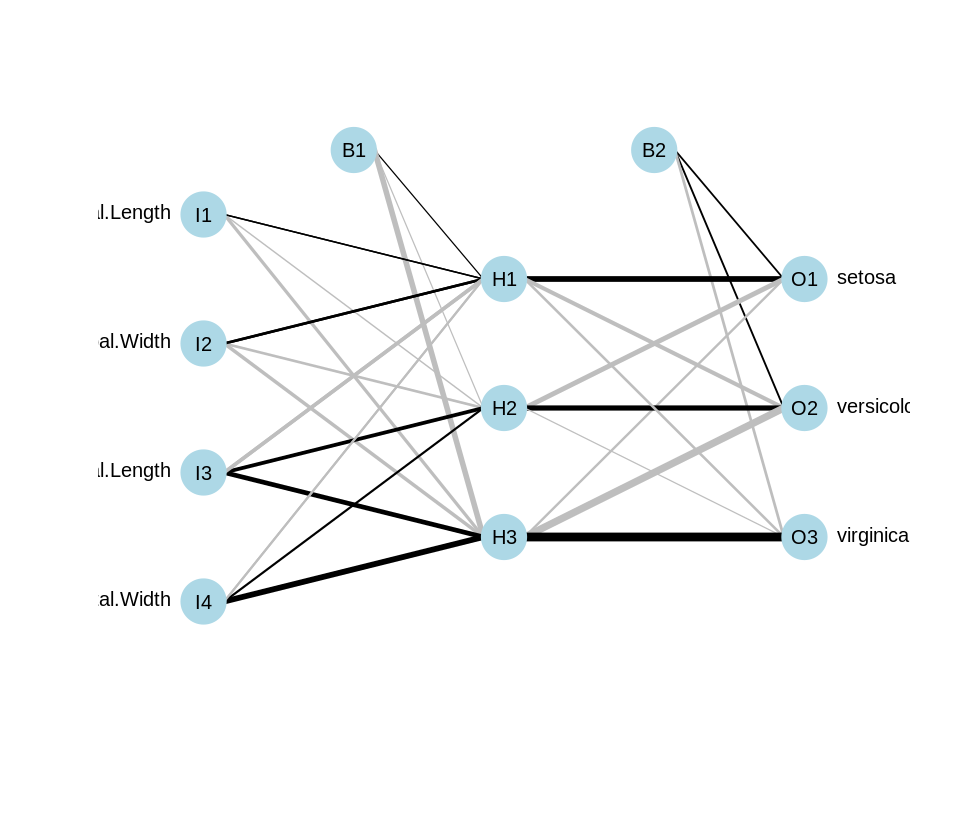

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         1
  virginica       0          2        49

Overall Statistics
                                          
               Accuracy : 0.98            
                 95% CI : (0.9427, 0.9959)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.97            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9600           0.9800
Specificity                 1.0000            0.9900           0.9800
Pos Pred Value              1.0000            0.9796           0.9608
Neg Pred Value              1.0000            0.9802           0.9899
P

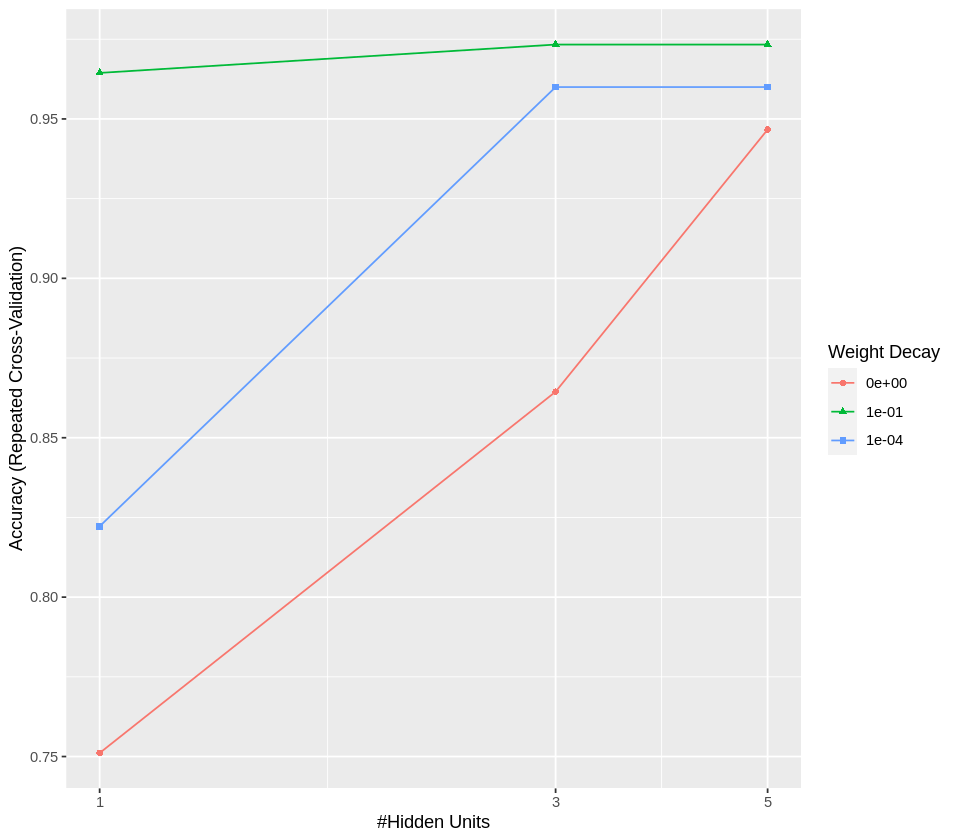

In [18]:
# 最終モデル取得（全データ使用）
# 検証
set.seed(123)

cores = detectCores() 
cl <- makePSOCKcluster(cores)     # PCのコア数（並列化）
registerDoParallel(cl)

tic()
model <- train(Species~., data=dat,      # 全データ使用
              method="nnet", trControl=tc)
toc()
stopCluster(cl)
# 検証結果確認(1)
# 妥当なハイパーパラメータ
model$bestTune

# モデル概要
model
# 最終モデル
model$finalModel

# モデルの視覚化
#nnet.plot(model$finalModel)      # ★★★機能なし
# ★★★NeuralNetToolsのプロットを使用（option適宜設定）
plotnet(model$finalModel)

# ハイパーパラメータとパフォーマンス
ggplot(model) + scale_x_log10()

# 検証結果確認(2)
# 変数重要度
#varImp(model, scale = F) %>% plot()      # ★★★機能なし

# パフォーマンス（予測・精度）確認
pred <- predict(model, newdata = dat) %>% as.factor()
confusionMatrix(data = pred, y)     # 混同行列
